In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Datei einlesen
file_path = './data/IV_data_50um.csv'
df = pd.read_csv(file_path)

In [122]:
# Extract Voltage, Current and Time
voltage = df['voltage (V)']
current = df['current (A)']
time = df['time (s)']

# Divide voltage into 12 cycles
voltage_cycle_I = voltage[:196]
voltage_cycle_II = voltage[195:417]
voltage_cycle_III = voltage[416:662]
voltage_cycle_IV = voltage[661:933]
voltage_cycle_V = voltage[932:1228]
voltage_cycle_VI = voltage[1227:1324]
voltage_cycle_VII = voltage[1323:1619]
voltage_cycle_VIII = voltage[1618:1715]
voltage_cycle_IX = voltage[1714:2010]
voltage_cycle_X = voltage[2009:2106]
voltage_cycle_XI = voltage[2105:2401]
voltage_cycle_XII = voltage[2400:]

voltage_cycles_list = [voltage_cycle_I, voltage_cycle_II, voltage_cycle_III, voltage_cycle_IV, voltage_cycle_V, voltage_cycle_V, voltage_cycle_VI, voltage_cycle_VII, voltage_cycle_VIII, voltage_cycle_IX, voltage_cycle_X, voltage_cycle_XI, voltage_cycle_XII]

# Divide time into 12 cycles
time_cycle_I = time[:196]
time_cycle_II = time[195:417]
time_cycle_III = time[416:662]
time_cycle_IV = time[661:933]
time_cycle_V = time[932:1228]
time_cycle_VI = time[1227:1324]
time_cycle_VII = time[1323:1619]
time_cycle_VIII = time[1618:1715]
time_cycle_IX = time[1714:2010]
time_cycle_X = time[2009:2106]
time_cycle_XI = time[2105:2401]
time_cycle_XII = time[2400:]

time_cycles_list = [time_cycle_I, time_cycle_II, time_cycle_III, time_cycle_IV, time_cycle_V, time_cycle_V, time_cycle_VI, time_cycle_VII, time_cycle_VIII, time_cycle_IX, time_cycle_X, time_cycle_XI, time_cycle_XII]

# Divide current into 12 cycles
current_cycle_I = current[:196]
current_cycle_II = current[195:417]
current_cycle_III = current[416:662]
current_cycle_IV = current[661:933]
current_cycle_V = current[932:1228]
current_cycle_VI = current[1227:1324]
current_cycle_VII = current[1323:1619]
current_cycle_VIII = current[1618:1715]
current_cycle_IX = current[1714:2010]
current_cycle_X = current[2009:2106]
current_cycle_XI = current[2105:2401]
current_cycle_XII = current[2400:]

current_cycles_list = [current_cycle_I, current_cycle_II, current_cycle_III, current_cycle_IV, current_cycle_V, current_cycle_V, current_cycle_VI, current_cycle_VII, current_cycle_VIII, current_cycle_IX, current_cycle_X, current_cycle_XI, current_cycle_XII]

# Compute resistance values in 12 cycles
resistance_cycles_list = []
for i in range(len(voltage_cycles_list)):
    resistance_cycles_list.append(voltage_cycles_list[i] / current_cycles_list[i])

# Compute needed values for plotting
log_abs_voltage_list = []
for i in range(len(voltage_cycles_list)):
    log_abs_voltage_list.append(np.log(abs(voltage_cycles_list[i])))

sqrt_voltage_list = []
for i in range(len(voltage_cycles_list)):
    sqrt_voltage_list.append(np.sign(voltage_cycles_list[i]) * np.sqrt(abs(voltage_cycles_list[i])))

power_exponent_list = []
for i in range(len(voltage_cycles_list)):
    # power_exponent_list.append(np.gradient(np.log(abs(current_cycles_list[i]))) / np.gradient(np.log(abs(voltage_cycles_list[i]))))
    power_exponent_list.append(np.gradient(np.log(abs(current_cycles_list[i])), np.log(abs(voltage_cycles_list[i]))))

C:\Users\Phuoc Khang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\Phuoc Khang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\Phuoc Khang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\Phuoc Khang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1248: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


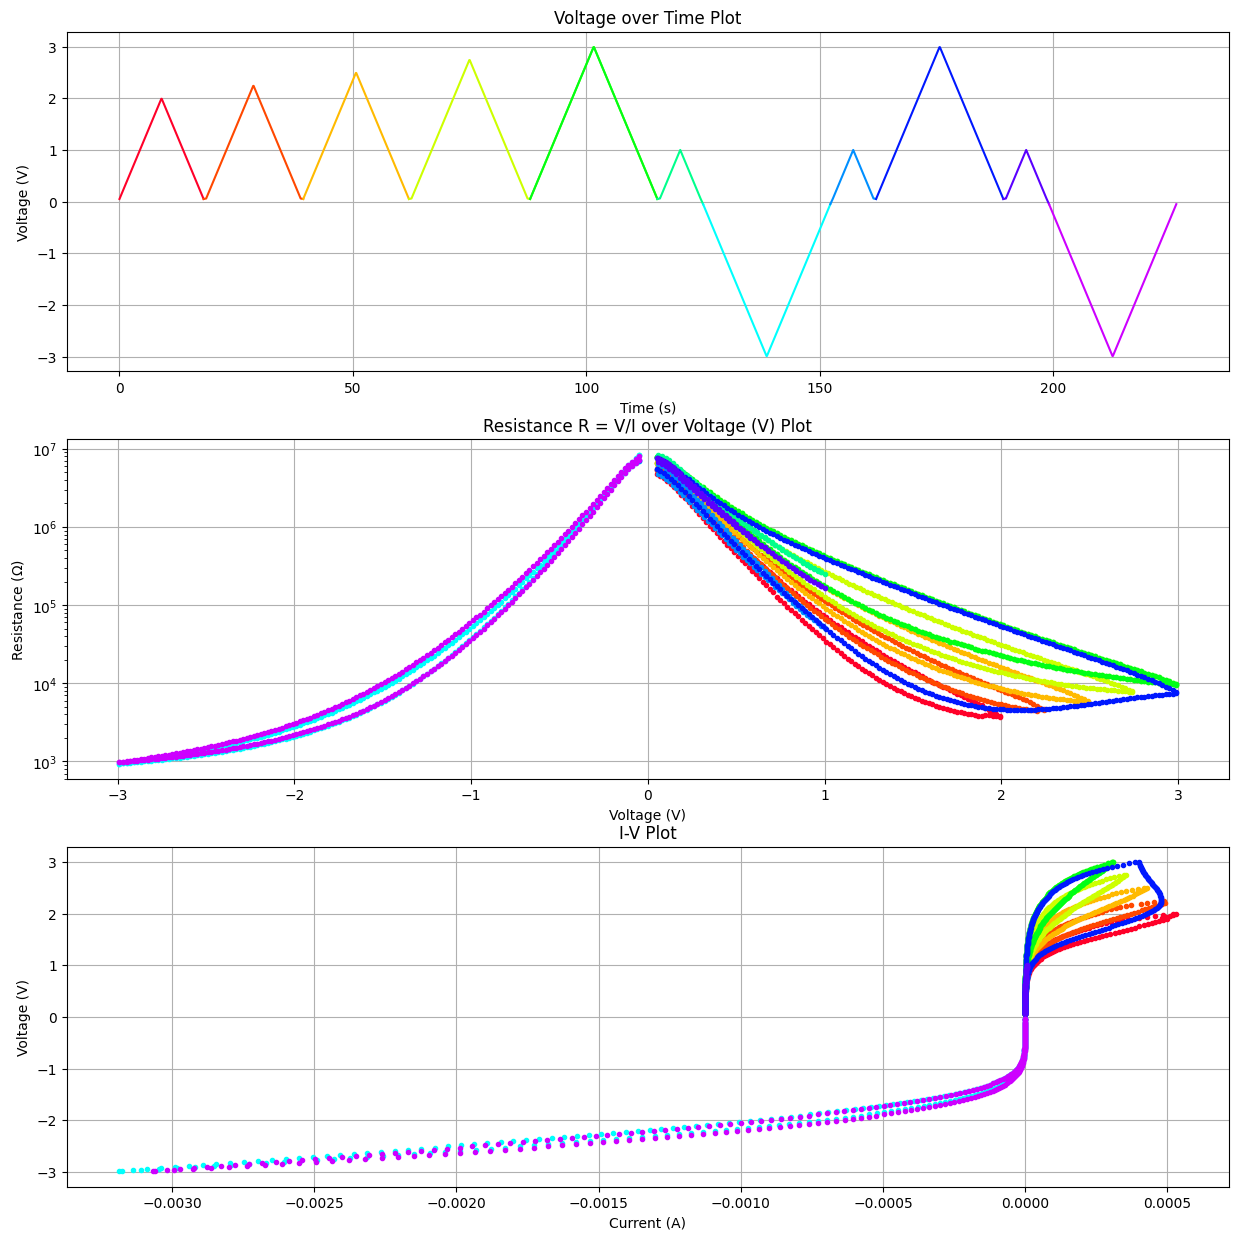

In [113]:
# Get colors
NUM_COLORS = 12
cm = plt.get_cmap('gist_rainbow')

# Plot
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Voltage over Time
axs[0].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    axs[0].plot(time_cycles_list[i], voltage_cycles_list[i])
axs[0].set_title('Voltage over Time Plot')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (V)')
axs[0].grid()

# Resistance over Voltage
axs[1].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    axs[1].plot(voltage_cycles_list[i], resistance_cycles_list[i], '.')
axs[1].set_title('Resistance R = V/I over Voltage (V) Plot')
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('Resistance ' + r'($\Omega$)')
axs[1].set_yscale('log')
axs[1].grid()

# Voltage over Current
axs[2].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    axs[2].plot(current_cycles_list[i], voltage_cycles_list[i], '.')
axs[2].set_title('I-V Plot')
axs[2].set_xlabel('Current (A)')
axs[2].set_ylabel('Voltage (V)')
axs[2].grid()
plt.show()

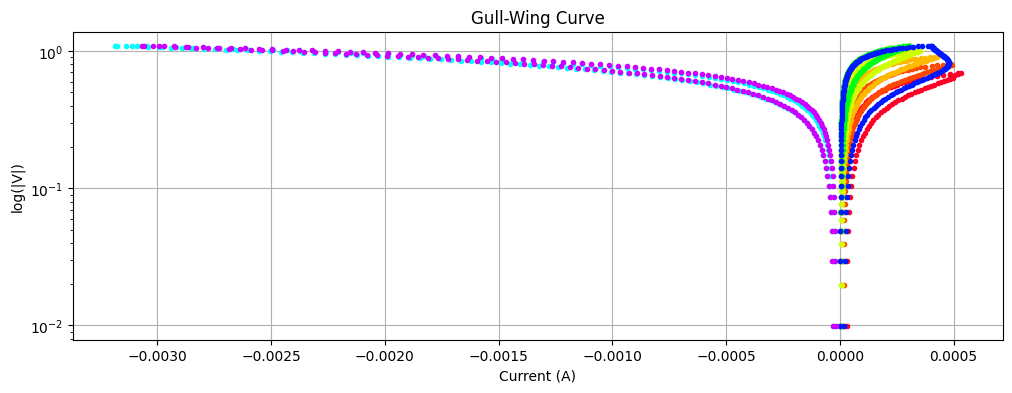

In [114]:
# Get colors
NUM_COLORS = 12
cm = plt.get_cmap('gist_rainbow')

# Gull-Wing Curve: X-axis - current A & Y-axis - log(|V|)
fig1, axs1 = plt.subplots(figsize=(12, 4))
axs1.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):    
    axs1.plot(current_cycles_list[i], log_abs_voltage_list[i], '.')
axs1.set_title('Gull-Wing Curve')
axs1.set_xlabel('Current (A)')
axs1.set_ylabel('log(|V|)')
axs1.set_yscale('log')
axs1.grid()

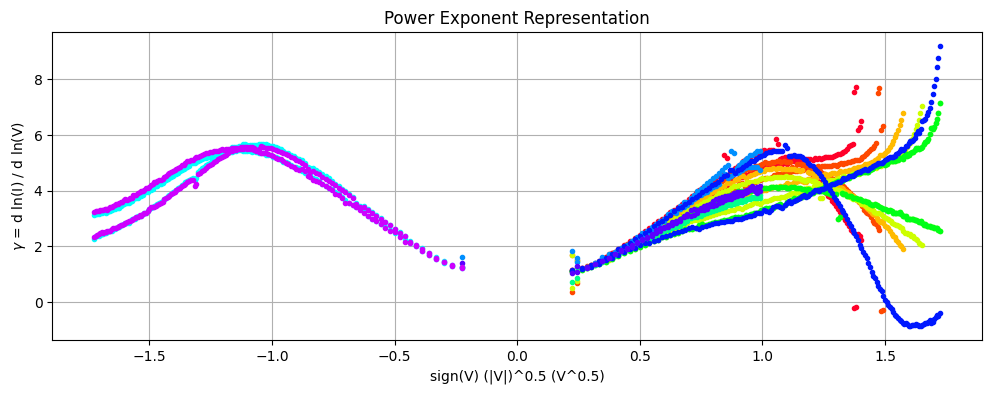

In [127]:
# Get colors
NUM_COLORS = 12
cm = plt.get_cmap('gist_rainbow')

# Power Exponent Representation: X-axis - d ln(I) / d ln(V) & Y-axis - sign(V) (|V|)^0.5 (V^0.5)
fig2, axs2 = plt.subplots(figsize=(12, 4))
axs2.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    axs2.plot(sqrt_voltage_list[i], power_exponent_list[i], '.')
axs2.set_title('Power Exponent Representation')
axs2.set_xlabel('sign(V) (|V|)^0.5 (V^0.5)')
axs2.set_ylabel(r'$\gamma$ ' + '= d ln(I) / d ln(V)')
axs2.grid()